In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
# reflect the tables
Base = automap_base()
Base.prepare(autoload_with=engine)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
measure = Base.classes.measurement
station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
recent = session.query(measure).order_by(measure.date.desc()).first()
print(f'The most recent date in this data set is {recent.date}')

The most recent date in this data set is 2017-08-23


<Figure size 1000x800 with 0 Axes>

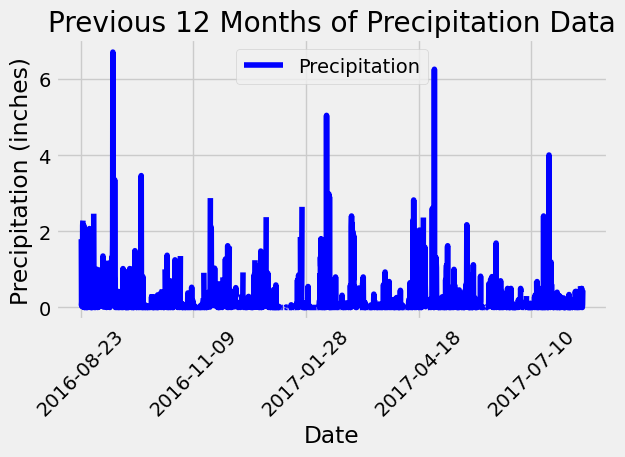

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database.

# Calculate the date one year from the last date in data set.
one_year_ago = dt.datetime.strptime('2017-08-23', '%Y-%m-%d').date() - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores for the last 12 months
last_12_months_data = session.query(measure.date, measure.prcp).filter(measure.date >= one_year_ago).all()

# Save the query results as a Pandas DataFrame
df = pd.DataFrame(last_12_months_data, columns=['Date', 'Precipitation'])

# Sort the dataframe by date
df = df.sort_values('Date')


# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(10,8))
df.plot(x='Date', y='Precipitation', color='b', legend=True)
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.title('Previous 12 Months of Precipitation Data')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [12]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_statistics = df.describe()

# Print the formatted summary statistics
print(f"Summary Statistics:\n{summary_statistics}")

Summary Statistics:
       Precipitation
count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(station.id).count()
total_stations

9

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stations = (session.query(measure.station, func.count(measure.station)).
    group_by(measure.station).
    order_by(func.count(measure.station).desc()).all())

most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active = 'USC00519281'
temperature_stats = (
    session.query(
        func.min(measure.tobs).label('lowest_temperature'),
        func.max(measure.tobs).label('highest_temperature'),
        func.avg(measure.tobs).label('average_temperature')
    )
    .filter(measure.station == most_active)
    .all()
)
temperature_stats

[(54.0, 85.0, 71.66378066378067)]

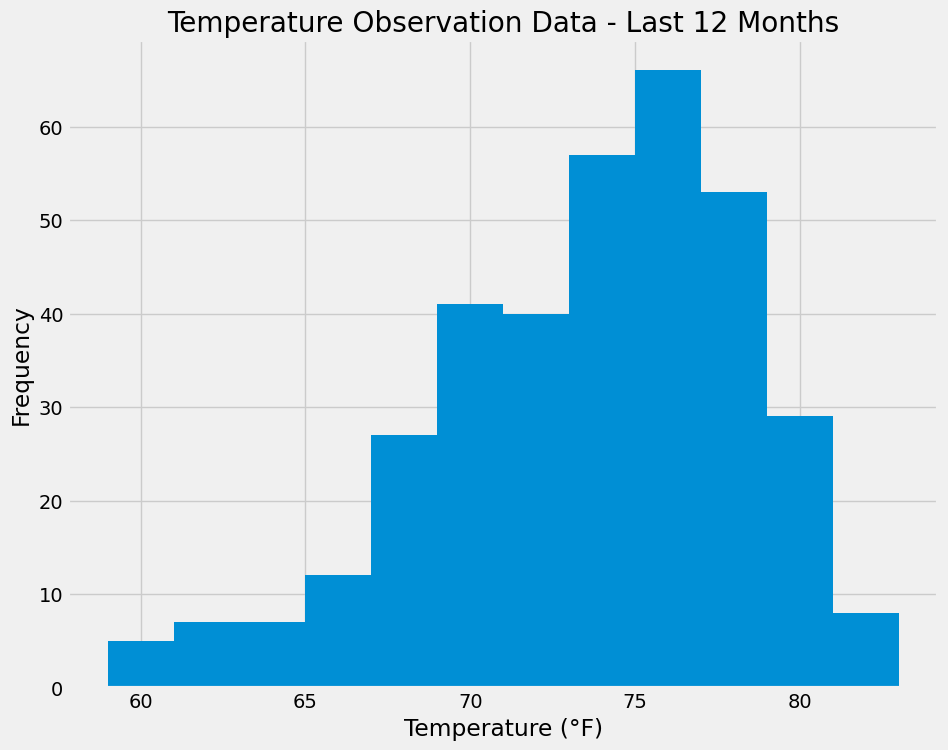

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_12_months_temps = (
    session.query(measure.date, measure.tobs)
    .filter(measure.station == most_active)
    .filter(measure.date >= one_year_ago)
    .all()
)
df_temps = pd.DataFrame(last_12_months_temps, columns=['Date', 'Temperature'])
plt.figure(figsize=(10, 8))
plt.hist(df_temps['Temperature'], bins=12)
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.title('Temperature Observation Data - Last 12 Months')
plt.show()


# Close Session

In [16]:
# Close Session
session.close()